In [39]:
%matplotlib inline

from numpy import *
from numpy.linalg import norm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import *
from numpy import *

Considérons à nouveau la fonction de deux variables que nous avons vues précédemment :

$$f(x, y) = -0.4+(x+15)/30 + (y+15)/40 + 0.5\sin(r), r = \sqrt{x^2+y^2}
$$
Nous pouvons tracer cette fonction comme précédemment :

In [40]:
x = arange(-15, 15, 0.25)
y = arange(-15, 15, 0.25)
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
Z = -.4 + (X+15)/30. + (Y+15)/40.+.5*sin(R)

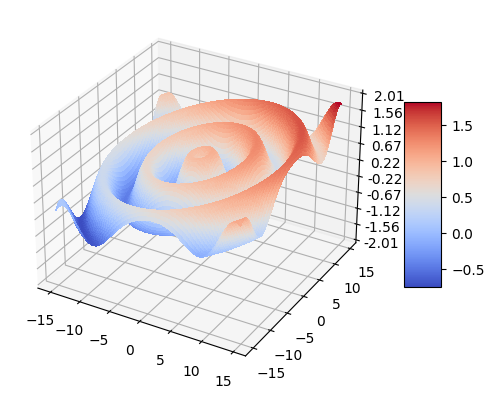

In [41]:

fig = figure(3)
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-2.01, 2.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
show()

Supposons que nous voulions trouver un minimum local de cette fonction. Pour ce faire, nous devons calculer son gradient.

Voici un exemple de calcul :
$$\frac{\partial f}{\partial x} = 1/30 + 0.5\cos(r)\frac{\partial r}{\partial x}
$$

$$\frac{\partial r}{\partial y} = (0.5(x^2+y^2)^{-1/2})(2 x)
$$
Nous pouvons obtenir ce qui suit :

In [42]:
def f(x, y):
    r = sqrt(x**2 + y**2)
    return -.4 + (x+15)/30. + (y+15)/40.+.5*sin(r)
def drdx(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*x)

def drdy(x, y, r):
    return (.5*(x**2 + y**2)**-.5)*(2*y)

def dfdx(x, y):
    r = sqrt(x**2 + y**2)
    return 1/30. + .5*cos(r)*drdx(x, y, r)

def dfdy(x, y):
    r = sqrt(x**2 + y**2)
    return 1/40. + .5*cos(r)*drdy(x, y, r)

def gradf(x, y):
    return array([dfdx(x, y), dfdy(x, y)])

Vérifions que nous avons bien fait les choses :

In [43]:

x = 0
y = 5
h = 0.001
(f(x+h, y)-f(x, y))/h

0.033347516444903746

In [44]:

dfdx(x, y)

0.03333333333333333

In [45]:
(f(x, y+h)-f(x, y))/h

0.16707080014188858

In [46]:
dfdy(x, y)

0.16683109273161312

Assez proche! Nous nous attendrions à nous rapprocher si nous réduisions $ h$.

In [47]:
gradf(x, y)

array([0.03333333, 0.16683109])

C'est juste la même chose. Nous sommes maintenant prêts à mettre en œuvre la descente de gradient

In [48]:
def grad_descent2(f, gradf, init_t, alpha):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    loss=[]

    max_iter = 1000
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= alpha*gradf(t[0], t[1])
        print(t, f(t[0], t[1]), gradf(t[0], t[1]))
        iter += 1
        loss.append(f(t[0], t[1]))


    return t,loss

Essayons de l'exécuter, guidés par le tracé de contour pour savoir par où commencer.

In [49]:
f(10., 8.)


1.1271253262964116

In [50]:
t,loss=grad_descent2(f, gradf, array([10.0, 8.0]), 0.01)

[9.99587412 7.99671596] 1.124342902003894 [0.413072   0.32879157]
[9.9917434  7.99342804] 1.1215539703655664 [0.41354556 0.32917105]
[9.98760794 7.99013633] 1.1187586595369354 [0.41400905 0.32954248]
[9.98346785 7.98684091] 1.1159570989700354 [0.41446241 0.3299058 ]
[9.97932323 7.98354185] 1.1131494193918154 [0.41490557 0.33026098]
[9.97517417 7.98023924] 1.1103357527819873 [0.41533849 0.33060795]
[9.97102078 7.97693316] 1.1075162323503374 [0.4157611  0.33094668]
[9.96686317 7.97362369] 1.104690992513518 [0.41617334 0.33127712]
[9.96270144 7.97031092] 1.1018601688713172 [0.41657517 0.33159923]
[9.95853569 7.96699493] 1.0990238981824245 [0.41696652 0.33191296]
[9.95436602 7.9636758 ] 1.0961823183396875 [0.41734736 0.33221828]
[9.95019255 7.96035362] 1.093335568344879 [0.41771762 0.33251514]
[9.94601537 7.95702847] 1.0904837882829834 [0.41807726 0.3328035 ]
[9.9418346  7.95370043] 1.0876271192960003 [0.41842622 0.33308333]
[9.93765034 7.9503696 ] 1.084765703556289 [0.41876447 0.33335458]

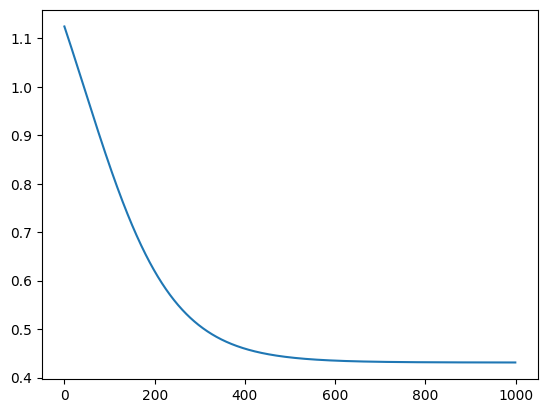

In [51]:

plot(loss)
